In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [361]:
data = pd.read_csv('dataset_6_letter.csv', index_col=False)

In [362]:
data

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5,10,5,8,3,4,10,7,8,12,10,9,2,9,2,6,C
19996,4,7,6,5,3,7,8,2,10,12,6,8,1,9,6,8,Z
19997,4,8,4,6,4,7,8,7,4,10,7,6,3,9,3,7,O
19998,4,11,4,8,3,0,2,4,6,1,0,7,0,8,0,8,L


In [363]:
data.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [364]:
x = data.iloc[:, 1:16]
y = data['class']

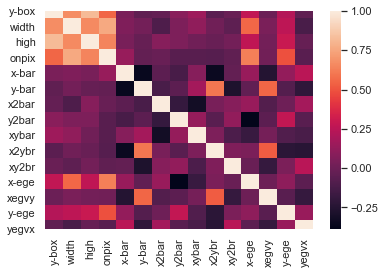

In [365]:
import seaborn as sns; sns.set() 

corr = x.corr()
sns.heatmap(corr)

In [366]:
x = x.drop(columns=['high','onpix'])

In [367]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [368]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(alpha=0.0001, max_iter=2000, tol=1e-3).fit(X_train, Y_train)

In [369]:
Y_hat = SGD.predict(X_test)

In [370]:
SGD.score(X_test, Y_test)

0.5556666666666666

Text(66.5, 0.5, 'predicted label')

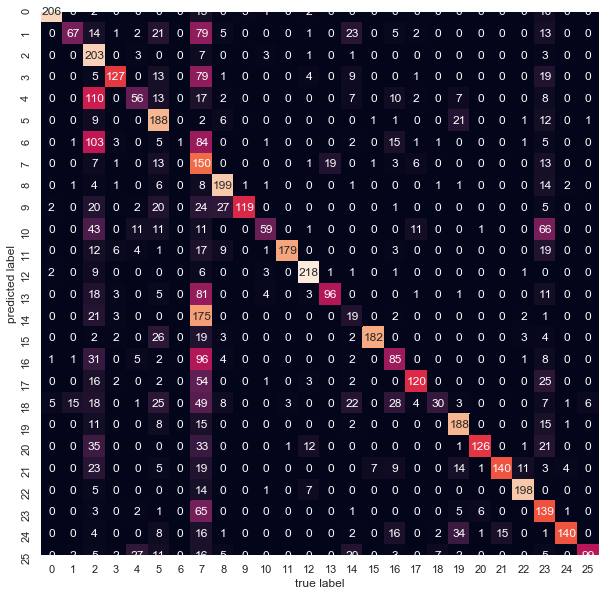

In [371]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,10))
mat = confusion_matrix(Y_hat, Y_test)
sns.heatmap(mat.T, square=False, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [372]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_hat, Y_test)

0.5556666666666666

In [373]:
from sklearn import svm

SVC = svm.SVC(gamma='scale')
SVC.fit(X_train, Y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [374]:
Y_hat1 = SVC.predict(X_test)

Text(66.5, 0.5, 'predicted label')

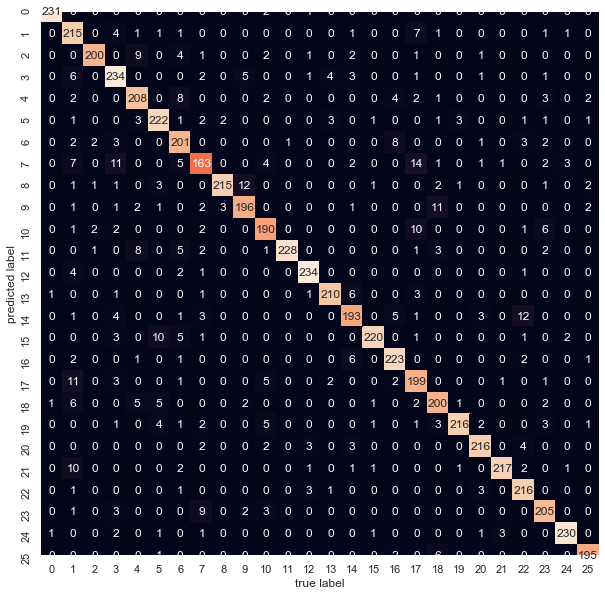

In [375]:
plt.figure(figsize=(10,10))
mat1 = confusion_matrix(Y_hat1, Y_test)
sns.heatmap(mat1.T, square=False, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [376]:
accuracy_score(Y_hat1, Y_test)

0.9128333333333334

In [377]:
from sklearn.kernel_approximation import Nystroem

feature_map_nystroem = Nystroem(gamma=.2,random_state=1,n_components=300)
data_transformed = feature_map_nystroem.fit_transform(X_train)
SGD1 = SGDClassifier(max_iter=100, tol=1e-3)
SGD1.fit(data_transformed, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [378]:
SGD1.score(data_transformed, Y_train)

0.5264285714285715

In [379]:
from sklearn.neighbors import KNeighborsClassifier

NNC = KNeighborsClassifier().fit(X_train, Y_train)

In [380]:
Y_hat2 = NNC.predict(X_test)

Text(66.5, 0.5, 'predicted label')

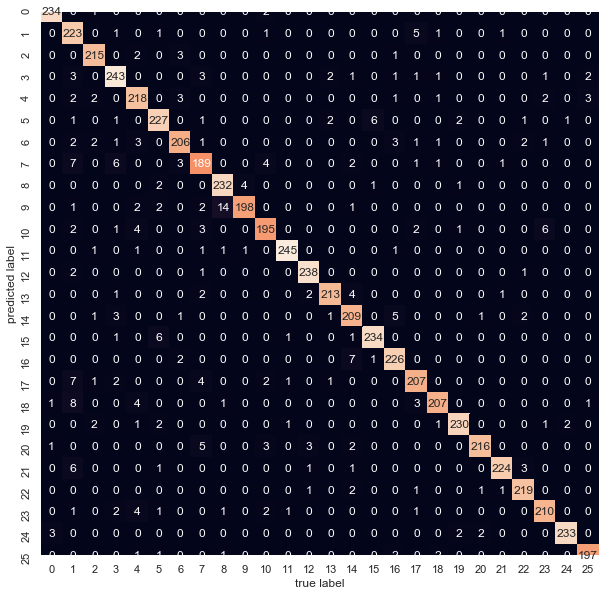

In [381]:
plt.figure(figsize=(10,10))
mat2 = confusion_matrix(Y_hat2, Y_test)
sns.heatmap(mat2.T, square=False, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [382]:
accuracy_score(Y_hat2, Y_test)

0.948

In [383]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=200, random_state=0)
GBC.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [384]:
Y_hat3 = GBC.predict(X_test)

Text(66.5, 0.5, 'predicted label')

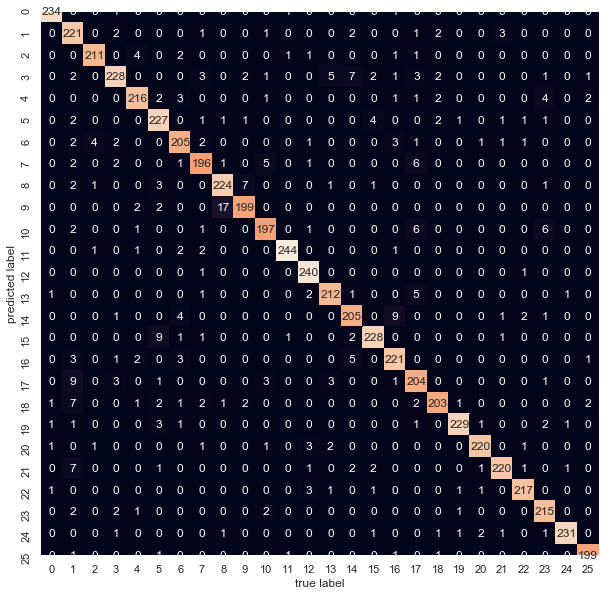

In [385]:
plt.figure(figsize=(10,10))
mat3 = confusion_matrix(Y_hat3, Y_test)
sns.heatmap(mat3.T, square=False, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [386]:
accuracy_score(Y_hat3, Y_test)

0.941

In [387]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=26, random_state=0)
clusters = kmeans.fit_predict(X_train)

In [388]:
kmeans.cluster_centers_.shape

(26, 13)

In [389]:
Y_train = np.asarray(Y_train)

In [390]:
import collections

for i in range(26):
    mask = (clusters == i)
    print(collections.Counter(Y_train[mask]).keys())
    print(collections.Counter(Y_train[mask]).values())

dict_keys(['G', 'S', 'E', 'C', 'B', 'Z', 'X', 'H', 'O', 'K', 'R', 'I', 'Q', 'L'])
dict_values([132, 54, 77, 61, 76, 76, 51, 7, 8, 46, 20, 5, 2, 3])
dict_keys(['F', 'R', 'Q', 'C', 'H', 'I', 'G', 'O', 'X', 'B', 'S', 'D', 'P', 'E', 'J', 'L', 'Z', 'Y', 'K', 'N', 'T', 'A', 'U'])
dict_values([14, 37, 46, 17, 25, 31, 25, 28, 13, 35, 27, 39, 32, 24, 12, 27, 10, 1, 20, 5, 6, 1, 1])
dict_keys(['F', 'T', 'Y', 'V', 'P', 'S', 'Z', 'C'])
dict_values([258, 172, 138, 70, 34, 3, 2, 2])
dict_keys(['Q', 'M', 'H', 'R', 'B', 'O', 'N', 'D', 'P', 'X', 'U', 'I', 'W', 'K', 'G', 'C'])
dict_values([135, 98, 61, 74, 5, 112, 75, 72, 37, 41, 48, 86, 34, 37, 10, 1])
dict_keys(['S', 'R', 'B', 'D', 'O', 'N', 'L', 'Q', 'G', 'E', 'P', 'T', 'V', 'H', 'C', 'J', 'K', 'A', 'F', 'I'])
dict_values([44, 168, 163, 150, 104, 17, 17, 100, 64, 7, 21, 14, 1, 21, 5, 3, 1, 1, 2, 1])
dict_keys(['L', 'X', 'E', 'R', 'H', 'F', 'D', 'Z', 'K', 'B', 'I', 'N', 'J', 'M', 'S', 'P', 'G'])
dict_values([88, 57, 69, 43, 52, 9, 72, 74, 48, 66, 95, 

In [391]:
for n, i in enumerate(Y_train):
    if i == 'G':
        Y_train[n] = 0
    elif i == 'S':
        Y_train[n] = 1
    elif i == 'F':
        Y_train[n] = 2
    elif i == 'Q':
        Y_train[n] = 3
    elif i == 'R':
        Y_train[n] = 4
    elif i == 'I':
        Y_train[n] = 5
    elif i == 'Y':
        Y_train[n] = 6
    elif i == 'K':
        Y_train[n] = 7
    elif i == 'U':
        Y_train[n] = 8
    elif i == 'V':
        Y_train[n] = 9
    elif i == 'O':
        Y_train[n] = 10
    elif i == 'A':
        Y_train[n] = 11
    elif i == 'Z':
        Y_train[n] = 12
    elif i == 'L':
        Y_train[n] = 13
    elif i == 'W':
        Y_train[n] = 14
    elif i == 'M':
        Y_train[n] = 15
    elif i == 'H':
        Y_train[n] = 16
    elif i == 'X':
        Y_train[n] = 17
    elif i == 'B':
        Y_train[n] = 18
    elif i == 'D':
        Y_train[n] = 19
    elif i == 'J':
        Y_train[n] = 20
    elif i == 'C':
        Y_train[n] = 21
    elif i == 'N':
        Y_train[n] = 22
    elif i == 'E':
        Y_train[n] = 23
    elif i == 'P':
        Y_train[n] = 24
    else:
        Y_train[n] = 25

In [392]:
Y_train = Y_train.astype('int64')
Y_train.dtype

dtype('int64')

In [393]:
np.unique(Y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [394]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(26):
    mask = (clusters == i)
    labels[mask] = mode(Y_train[mask])[0]

In [395]:
np.unique(labels)

array([ 0,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 19, 20,
       21, 22, 24])

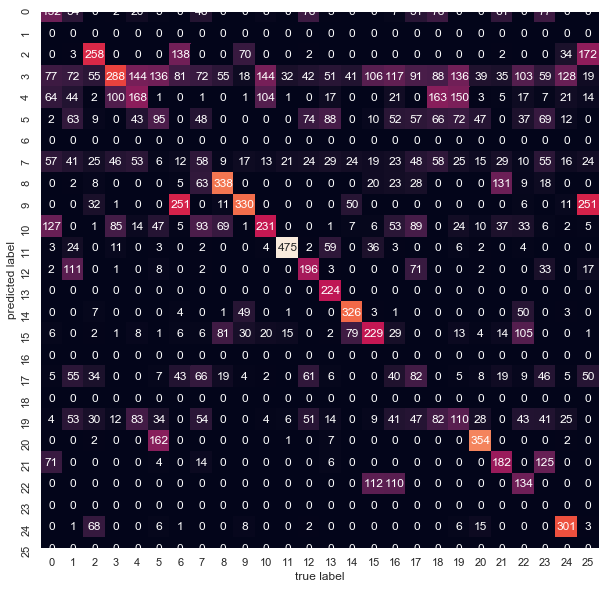

In [396]:
plt.figure(figsize=(10,10))
mat = confusion_matrix(Y_train, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [397]:
accuracy_score(Y_train, labels)

0.32221428571428573